# Cirebon Mask Classification Using Combined GLCM-SFTA Feature Texture and Multi Layer Perceptron Neural Network

## Import Library

In [1]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

## Load Dataset

In [2]:
trainData = pd.read_csv('data/dfCOMB_train.csv')
testData = pd.read_csv('data/dfCOMB_test.csv')
trainLabels = pd.read_csv('data/dfLTRAIN_train.csv')
testLabels = pd.read_csv('data/dfLTEST_test.csv')

In [3]:
trainData.shape, testData.shape

((1000, 28), (500, 28))

In [4]:
combine = [trainData, testData, trainLabels, testLabels]
pd.concat(combine)

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,506.93771,742.165345,530.442081,866.671751,0.175163,0.169320,0.177496,0.170005,0.900115,0.853773,...,2558.0,1.457192,94.966967,2331.0,1.493424,42.337827,2522.0,1.457192,94.966967,2331.0
1,452.071782,681.159091,506.568929,794.563131,0.161801,0.155731,0.162771,0.155705,0.891290,0.836331,...,2459.0,1.437986,90.326067,2156.0,1.487348,42.582395,2488.0,1.437986,90.326067,2156.0
2,582.026985,1399.285502,1102.061912,1376.575312,0.142958,0.136409,0.146532,0.136338,0.925417,0.820684,...,2421.0,1.448868,146.854179,1639.0,1.507132,64.738904,2884.0,1.460113,150.130284,1727.0
3,596.368576,1427.003788,1116.916471,1399.538844,0.137422,0.131195,0.140620,0.130976,0.925253,0.821180,...,2400.0,1.451992,146.087635,1666.0,1.499120,65.412871,2766.0,1.464932,149.259490,1765.0
4,596.368576,1427.003788,1116.916471,1399.538844,0.137422,0.131195,0.140620,0.130976,0.925253,0.821180,...,2400.0,1.451992,146.087635,1666.0,1.499120,65.412871,2766.0,1.464932,149.259490,1765.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,tumenggung,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
496,tumenggung,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
497,tumenggung,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
498,tumenggung,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
labels = trainLabels.iloc[:,0].unique()
print(labels)

['klana' 'pamindo' 'panji' 'rumyang' 'tumenggung']


## Exploratory Data Analysis

In [6]:
# Transform images to array
train = np.array(trainData)
test = np.array(testData)
train_label = np.array(trainLabels)
test_label = np.array(testLabels)

In [7]:
X_train = train
y_train = train_label
print(X_train)

[[5.06937710e+02 7.42165345e+02 5.30442081e+02 ... 1.45719228e+00
  9.49669670e+01 2.33100000e+03]
 [4.52071782e+02 6.81159091e+02 5.06568929e+02 ... 1.43798618e+00
  9.03260668e+01 2.15600000e+03]
 [5.82026985e+02 1.39928550e+03 1.10206191e+03 ... 1.46011291e+00
  1.50130284e+02 1.72700000e+03]
 ...
 [4.46644395e+02 6.37968278e+02 3.85697438e+02 ... 1.52637219e+00
  9.50370821e+01 1.64500000e+03]
 [4.49162941e+02 6.45556641e+02 3.87452975e+02 ... 1.52869730e+00
  9.48435252e+01 1.66800000e+03]
 [4.44997268e+02 6.43593455e+02 3.83911488e+02 ... 1.52466067e+00
  9.46614078e+01 1.64800000e+03]]


In [8]:
X_test = test
y_test = test_label
print(X_test)

[[5.58547740e+02 1.35721732e+03 1.06799301e+03 ... 1.45167327e+00
  1.53548214e+02 1.68000000e+03]
 [5.62985216e+02 1.15489362e+03 8.22010275e+02 ... 1.53278751e+00
  1.17363369e+02 1.69800000e+03]
 [5.35636364e+02 1.10712571e+03 8.41116204e+02 ... 1.44759703e+00
  1.08575566e+02 2.21000000e+03]
 ...
 [4.08515069e+02 5.85187117e+02 3.44793607e+02 ... 1.51368368e+00
  9.22354818e+01 1.56700000e+03]
 [2.78772076e+02 4.02728176e+02 2.48906098e+02 ... 1.49467404e+00
  7.27611111e+01 1.44000000e+03]
 [5.44190665e+02 8.06012556e+02 4.86501806e+02 ... 1.43150173e+00
  1.01120352e+02 2.04400000e+03]]


### Normalization Data

In [9]:
# Normalize the feature data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
print(X_train.shape)
print(X_test.shape)

(1000, 28)
(500, 28)


### Encode Labels

In [10]:
# Encode the labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_train[:,0])
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 

### Feature Scaling

In [11]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
print(X_scaled)

[[ 0.48636612 -0.46213073 -0.39995366 ...  0.7716364  -1.3010662
   2.2166388 ]
 [ 0.00774367 -0.6631873  -0.4906403  ...  0.5133294  -1.4669949
   1.7250417 ]
 [ 1.141407    1.7035221   1.771455   ...  0.8109163   0.6712162
   0.5199271 ]
 ...
 [-0.03960183 -0.8055302  -0.9497941  ...  1.7020465  -1.2985594
   0.2895786 ]
 [-0.01763167 -0.7805213  -0.9431255  ...  1.7333174  -1.3054796
   0.3541885 ]
 [-0.05397086 -0.7869913  -0.95657843 ...  1.679029   -1.311991
   0.29800618]]


## Splitting Data

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42, stratify= y)

print("Data Training : ", X_train.shape, y_train.shape)
print("Data Testing : ", X_test.shape, y_test.shape)

Data Training :  (800, 28) (800,)
Data Testing :  (200, 28) (200,)


## Reshape Data

In [13]:
# Reshape data for MLP Neural Network
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Print shape the data
print(f'Data Training with Shape : {X_train.shape, y_train.shape}')
print(f'Data Testing with Shape : {X_test.shape, y_test.shape}')

Data Training with Shape : ((800, 28, 1), (800,))
Data Testing with Shape : ((200, 28, 1), (200,))


## One Hot Encoding

In [14]:
# One-hot encode the target data
y_train_onehot = to_categorical(y_train, num_classes=5)
y_test_onehot = to_categorical(y_test, num_classes=5)
y_test_onehot

array([[0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0.

## Modelling With Neural Network

In [23]:
# Modelling with MLP Neural Network
num_classes = 5

model = Sequential()

model.add(Dense(64, activation = 'relu', input_shape = (X_train.shape[1],)))
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation = 'softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                1856      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 5)                 325       
                                                                 
Total params: 2181 (8.52 KB)
Trainable params: 2181 (8.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


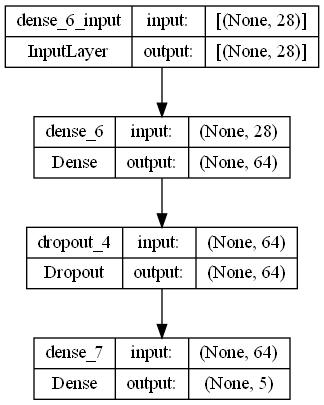

In [24]:
# Create plot model from define model NN
tf.keras.utils.plot_model(model, to_file='model/model_nn.png', show_shapes=True, show_layer_names=True)

In [27]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
# Train the model
EPOCHS = 20
BATCH_SIZE = 64

history = model.fit(X_train, y_train_onehot, 
                    epochs = EPOCHS,
                    batch_size = BATCH_SIZE,
                    validation_data=(X_test, y_test_onehot), 
                    verbose = 1)

Epoch 1/20
13/13 [==============================] - 1s 27ms/step - loss: 1.7027 - accuracy: 0.1950 - val_loss: 1.1818 - val_accuracy: 0.5650
Epoch 2/20
13/13 [==============================] - 0s 15ms/step - loss: 1.0807 - accuracy: 0.5825 - val_loss: 0.7690 - val_accuracy: 0.7800
Epoch 3/20
13/13 [==============================] - 0s 9ms/step - loss: 0.7298 - accuracy: 0.7887 - val_loss: 0.5755 - val_accuracy: 0.8300
Epoch 4/20
13/13 [==============================] - 0s 9ms/step - loss: 0.5981 - accuracy: 0.8300 - val_loss: 0.4636 - val_accuracy: 0.8600
Epoch 5/20
13/13 [==============================] - 0s 8ms/step - loss: 0.4703 - accuracy: 0.8825 - val_loss: 0.3854 - val_accuracy: 0.9050
Epoch 6/20
13/13 [==============================] - 0s 8ms/step - loss: 0.3929 - accuracy: 0.9112 - val_loss: 0.3271 - val_accuracy: 0.9200
Epoch 7/20
13/13 [==============================] - 0s 8ms/step - loss: 0.3534 - accuracy: 0.9200 - val_loss: 0.2794 - val_accuracy: 0.9200
Epoch 8/20
13/13 [

## Evaluation Model

In [29]:
# Evaluate the Model
score = model.evaluate(X_test, y_test_onehot)

print('Loss: {:.4f}'.format(score[0]))
print('Accuracy: {:.4f}'.format(score[1]))

7/7 [==============================] - 0s 2ms/step - loss: 0.0690 - accuracy: 0.9850
Loss: 0.0690
Accuracy: 0.9850


### Accuracy and Loss Plot

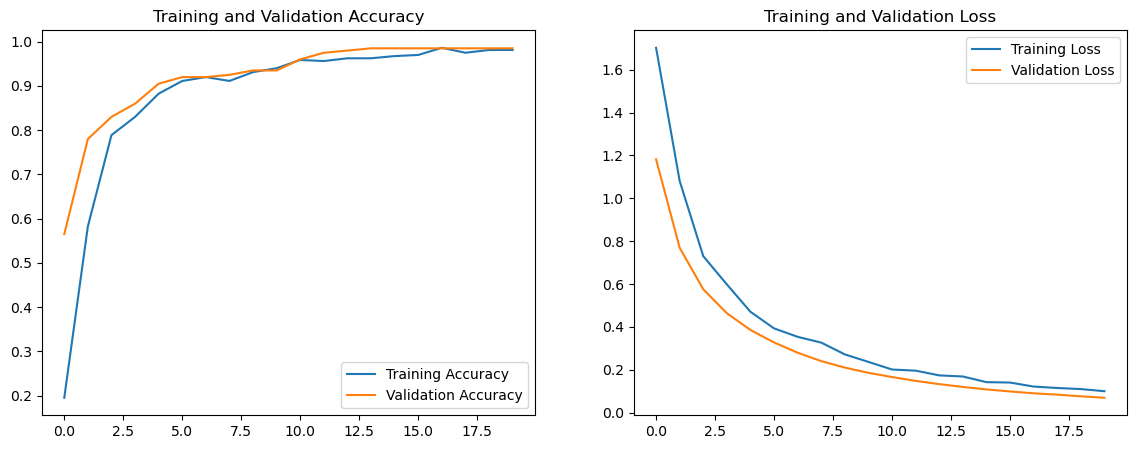

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Confusion Matrix

7/7 [==============================] - 0s 2ms/step


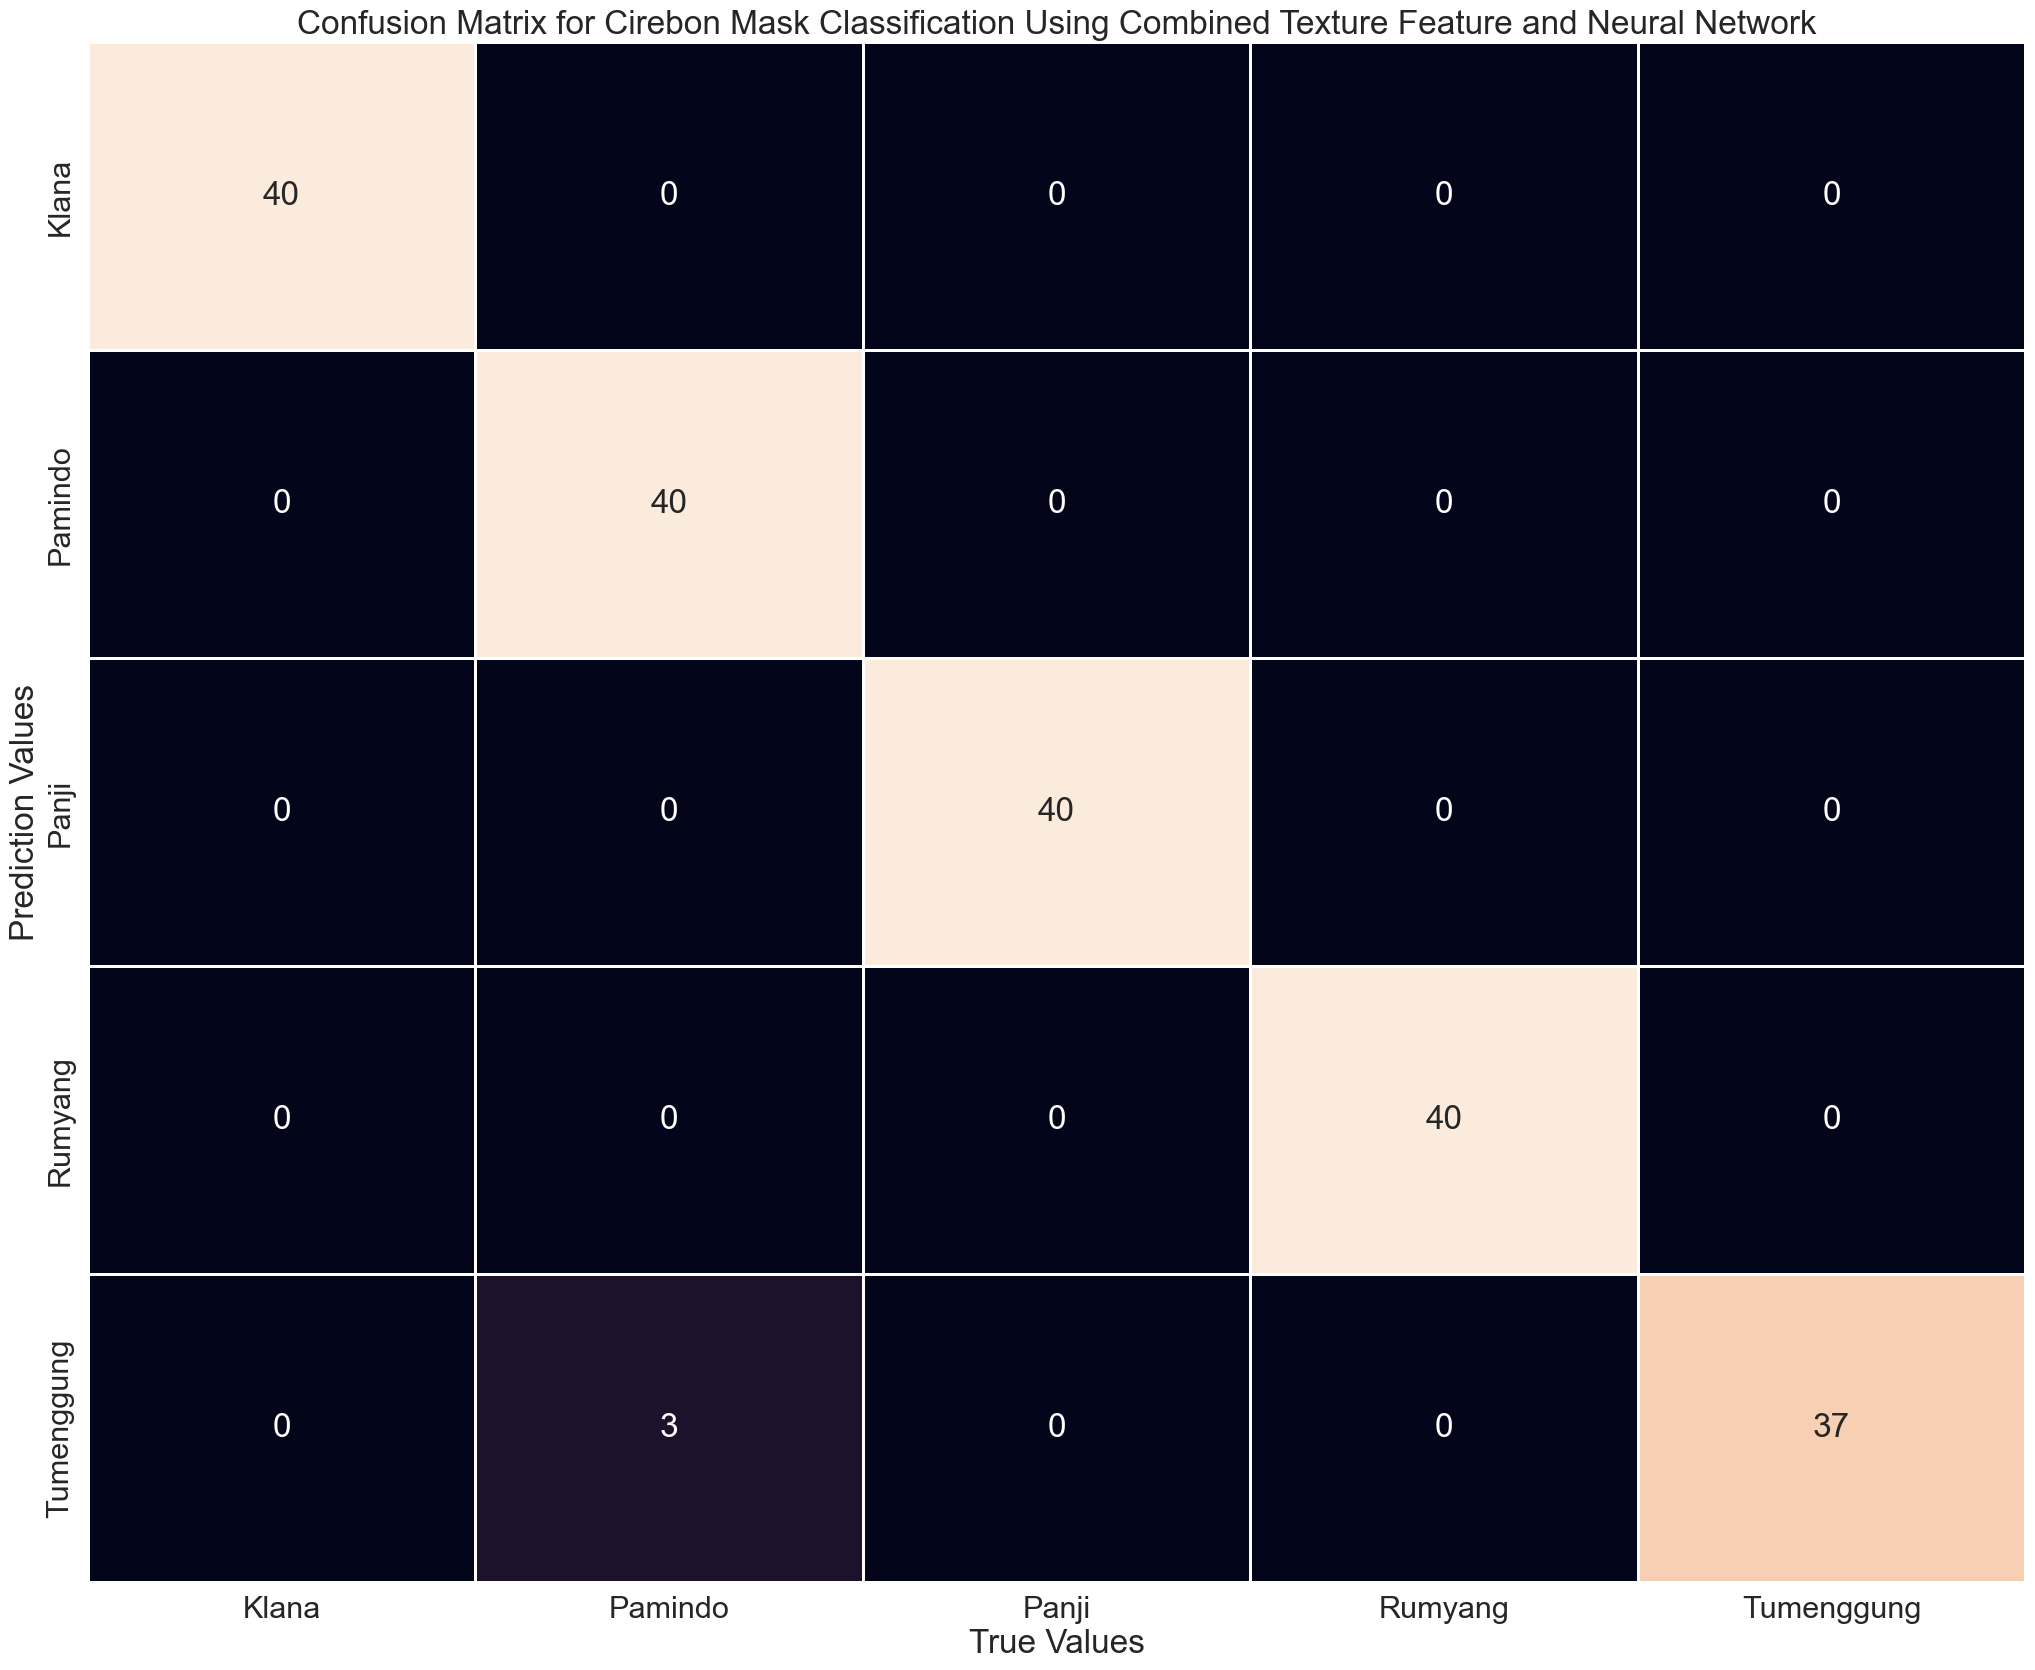

In [31]:
# Get Model Predictions for test data
class_names = ['Klana',
               'Pamindo',
               'Panji',
               'Rumyang',
               'Tumenggung']

# Plotting a confusion matrix for checking the performance of our model
Y_pred = np.argmax(model.predict(X_test), axis = 1)
cm = confusion_matrix(y_test, Y_pred, labels=np.unique(y_test), sample_weight=None)

df_cm = pd.DataFrame(cm, class_names, class_names)
sns.set(font_scale = 2)
plt.figure(figsize = (25, 20))
sns.heatmap(df_cm, annot = True, linewidths = 0.8, fmt = '0.4g', cbar = False)
plt.title("Confusion Matrix for Cirebon Mask Classification Using Combined Texture Feature and Neural Network")
plt.xlabel("True Values")
plt.ylabel("Prediction Values")
plt.show()

### Classification Report

In [32]:
# Evaluate Model from Classification Report
print(classification_report(y_test, Y_pred, target_names = class_names))

              precision    recall  f1-score   support

       Klana       1.00      1.00      1.00        40
     Pamindo       0.93      1.00      0.96        40
       Panji       1.00      1.00      1.00        40
     Rumyang       1.00      1.00      1.00        40
  Tumenggung       1.00      0.93      0.96        40

    accuracy                           0.98       200
   macro avg       0.99      0.98      0.98       200
weighted avg       0.99      0.98      0.98       200



## Reporting Model

In [33]:
evaluation = pd.DataFrame({'Model': [],
                           'Data_Train': [],
                           'Data_Test': [],
                           'Epochs': [],
                           'Batch_size':[],
                           'Loss': [],
                           'Accuracy': []
                           })

r = evaluation.shape[0]
evaluation.loc[r] = [model, str(X_train.shape), str(X_test.shape), EPOCHS, BATCH_SIZE, score[0], score[1]]
evaluation

,Model,Data_Train,Data_Test,Epochs,Batch_size,Loss,Accuracy
0,<keras.src.engine.sequential.Sequential object...,"(800, 28, 1)","(200, 28, 1)",20,64,0.069018,0.985


In [34]:
dict = {"Model" : evaluation.Model,
        "Data Train" : evaluation.Data_Train,
        "Data Test" : evaluation.Data_Test,
        "Epochs" : evaluation.Epochs,
        "Batch Size" : evaluation.Batch_size,
        "Loss" : evaluation.Loss,
        "Accuracy" : evaluation.Accuracy
        }

df = pd.DataFrame(dict)
# Save to Drive for CSV data
df.to_csv(r"data/hasil_model_NN.csv", index=False)
df

,Model,Data Train,Data Test,Epochs,Batch Size,Loss,Accuracy
0,<keras.src.engine.sequential.Sequential object...,"(800, 28, 1)","(200, 28, 1)",20,64,0.069018,0.985


## Save Model

In [36]:
model.save('model/nn_model.json')

INFO:tensorflow:Assets written to: model/nn_model.json\assets


INFO:tensorflow:Assets written to: model/nn_model.json\assets
